In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import sys

In [66]:
# Import data
df = pd.read_excel("raw_data.xlsx")

In [67]:
df.tail()

,Campus Community Notified,Date SMU was Notified of Positive Test,Last Known Date on Campus,Description,Active,Student,OnOffStudent,Employee,NotificationLag
241,2020-09-03,2020-09-03,2020-09-03,A student who lives on campus,1.0,1.0,1.0,0.0,0
242,2020-09-03,2020-09-03,2020-09-03,A student who lives off campus,1.0,1.0,0.0,0.0,0
243,2020-09-03,2020-09-03,2020-09-03,A student who lives on campus,1.0,1.0,1.0,0.0,0
244,2020-09-03,2020-09-03,2020-09-03,A student who lives on campus,1.0,1.0,1.0,0.0,0
245,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,x


# Active Cases

In [68]:
temp = df.copy()
temp_smu_dates = np.sort(temp["Date SMU was Notified of Positive Test"].unique())

In [69]:
counts = np.zeros(len(temp_smu_dates))
for i in range(len(temp_smu_dates)):
    sub_count = len(temp[temp["Date SMU was Notified of Positive Test"] == temp_smu_dates[i]])
    counts[i] = sub_count

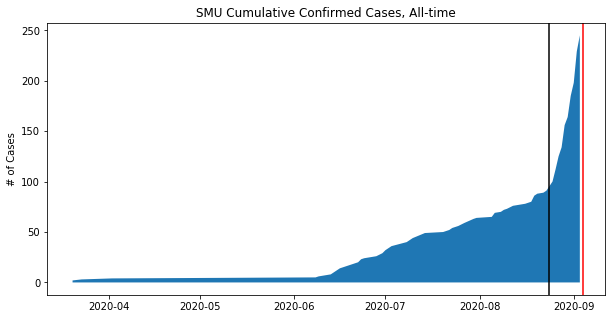

In [70]:
plt.figure(figsize=(10,5))
plt.fill_between(temp_smu_dates, np.cumsum(counts))
plt.title("SMU Cumulative Confirmed Cases, All-time")
plt.axvline(np.datetime64(dt.datetime.strptime("20-08-24", "%y-%m-%d")), ymin=0, c="k")
plt.axvline(np.datetime64(dt.datetime.now()), ymin=0, c="r")
plt.ylabel("# of Cases")
plt.savefig("cumulative_cases_all_time.png")

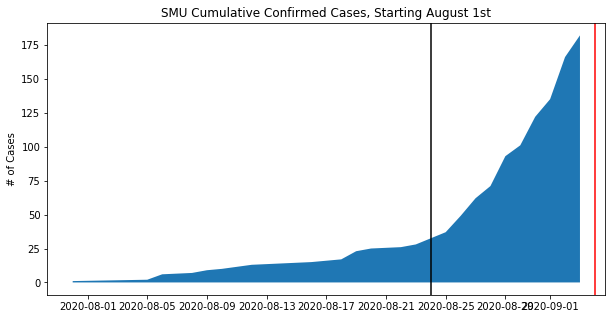

In [71]:
plt.figure(figsize=(10,5))
plt.fill_between(temp_smu_dates[28:], np.cumsum(counts[28:]))
plt.title("SMU Cumulative Confirmed Cases, Starting August 1st")
plt.axvline(np.datetime64(dt.datetime.strptime("20-08-24", "%y-%m-%d")), ymin=0, c="k")
plt.axvline(np.datetime64(dt.datetime.now()), ymin=0, c="r")
plt.ylabel("# of Cases")
plt.savefig("cumulative_cases_starting_august.png")

In [72]:
# Save dataframe.
d = {'Date': temp_smu_dates, 'Cases Reported to SMU': counts, "Cumulative Cases": np.cumsum(counts) }
d = pd.DataFrame(data=d)
d.to_csv("cleaned_case_data.csv", index=False)

In [73]:
# Save dataframe.
d = {'Date': temp_smu_dates[29:], 'Cases Reported to SMU': counts[29:], "Cumulative Cases": np.cumsum(counts[29:]) }
d = pd.DataFrame(data=d)
d.to_csv("cleaned_case_data_starting_august.csv", index=False)

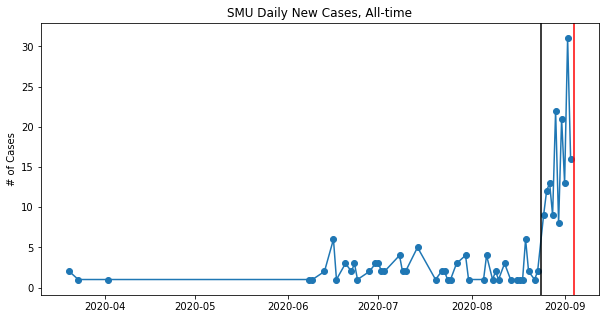

In [74]:
# Daily new cases.
plt.figure(figsize=(10,5))
plt.plot(temp_smu_dates, counts)
plt.scatter(temp_smu_dates, counts)
plt.title("SMU Daily New Cases, All-time")
plt.axvline(np.datetime64(dt.datetime.strptime("20-08-24", "%y-%m-%d")), ymin=0, c="k")
plt.axvline(np.datetime64(dt.datetime.now()), ymin=0, c="r")
plt.ylabel("# of Cases")
plt.savefig("daily_new_cases_all_time.png")

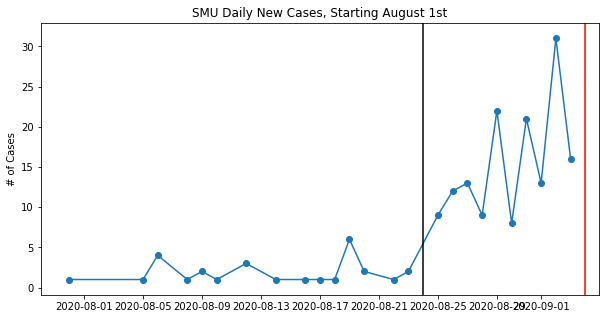

In [75]:
# Daily new cases.
plt.figure(figsize=(10,5))
plt.plot(temp_smu_dates[28:], counts[28:])
plt.scatter(temp_smu_dates[28:], counts[28:])
plt.title("SMU Daily New Cases, Starting August 1st")
plt.axvline(np.datetime64(dt.datetime.strptime("20-08-24", "%y-%m-%d")), ymin=0, c="k")
plt.axvline(np.datetime64(dt.datetime.now()), ymin=0, c="r")
plt.ylabel("# of Cases")
plt.savefig("daily_new_cases_starting_august.png")

# On/off Campus.

In [76]:
df.head()

,Campus Community Notified,Date SMU was Notified of Positive Test,Last Known Date on Campus,Description,Active,Student,OnOffStudent,Employee,NotificationLag
0,2020-08-28,2020-08-27,2020-08-24,A student who lives off campus,1.0,1.0,0.0,0.0,1
1,2020-08-28,2020-08-27,2020-08-27,A student who lives off campus,1.0,1.0,0.0,0.0,1
2,2020-08-28,2020-08-27,2020-08-27,A student who lives on campus,1.0,1.0,1.0,0.0,1
3,2020-08-28,2020-08-27,2020-08-27,A student who lives on campus,1.0,1.0,1.0,0.0,1
4,2020-08-28,2020-08-27,2020-08-27,A student who lives off campus,1.0,1.0,0.0,0.0,1


In [77]:
on_campus = df[df["OnOffStudent"] == 1]
off_campus = df[(df["Student"] == 1)&(df["OnOffStudent"] == 0)]

In [78]:
on_counts = np.zeros(len(temp_smu_dates))
off_counts = np.zeros(len(temp_smu_dates))
for i in range(len(temp_smu_dates)):
    on_sub_count = len(on_campus[on_campus["Date SMU was Notified of Positive Test"] == temp_smu_dates[i]])
    off_sub_count = len(off_campus[off_campus["Date SMU was Notified of Positive Test"] == temp_smu_dates[i]])
    on_counts[i] = on_sub_count
    off_counts[i] = off_sub_count 

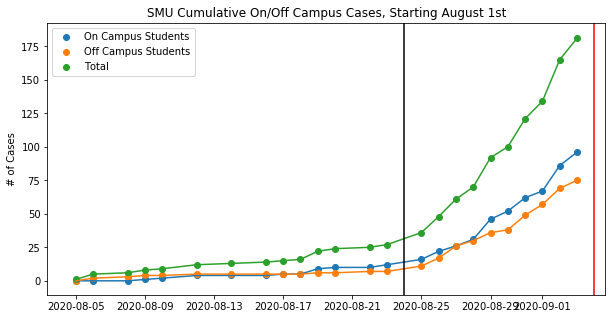

In [79]:
# Daily new cases.
plt.figure(figsize=(10,5))

plt.plot(temp_smu_dates[29:], np.cumsum(on_counts[29:]))
plt.scatter(temp_smu_dates[29:], np.cumsum(on_counts[29:]), label="On Campus Students")

plt.plot(temp_smu_dates[29:], np.cumsum(off_counts[29:]))
plt.scatter(temp_smu_dates[29:], np.cumsum(off_counts[29:]), label="Off Campus Students")

plt.plot(temp_smu_dates[29:], np.cumsum(counts[29:]))
plt.scatter(temp_smu_dates[29:], np.cumsum(counts[29:]), label="Total")

plt.title("SMU Cumulative On/Off Campus Cases, Starting August 1st")
plt.axvline(np.datetime64(dt.datetime.strptime("20-08-24", "%y-%m-%d")), ymin=0, c="k")
plt.axvline(np.datetime64(dt.datetime.now()), ymin=0, c="r")
plt.ylabel("# of Cases")
plt.legend()
plt.savefig("cumulative_on_off_cases_starting_august.png")

In [80]:
# Calculate number of on-campus infected students.
print(len(df[(df["Active"] == 1)&(df["OnOffStudent"] == 1)]))

86


# Compute Active Cases

In [157]:
temp = df.copy()
temp_smu_dates = np.sort(temp["Date SMU was Notified of Positive Test"].unique())

In [158]:
all_dates = pd.date_range(min(temp_smu_dates), max(temp_smu_dates)).values

In [159]:
ts = "Date SMU was Notified of Positive Test"

In [160]:
on_cases = temp[ temp["OnOffStudent"] == 1]
off_cases = temp[ (temp["OnOffStudent"] == 0)&(temp["Student"] == 1) ]
employee_cases = temp[ temp["Student"] == 0 ]

In [161]:
actives = []
on_actives = []
off_actives = []
employee_actives = []
cumulative_cases = []
for i in range(len(all_dates)):
    actives.append( len(temp[ (temp[ts] <= all_dates[i])&(temp[ts] >= all_dates[i] - np.timedelta64(10, "D") ) ]))
    on_actives.append( len(on_cases[ (on_cases[ts] <= all_dates[i])&(on_cases[ts] >= all_dates[i] - np.timedelta64(10, "D") ) ]))
    off_actives.append( len(off_cases[ (off_cases[ts] <= all_dates[i])&(off_cases[ts] >= all_dates[i] - np.timedelta64(10, "D") ) ]))
    employee_actives.append( len(employee_cases[ (employee_cases[ts] <= all_dates[i])&(employee_cases[ts] >= all_dates[i] - np.timedelta64(10, "D") ) ]))
    cumulative_cases.append( len( temp[ temp[ts] <= all_dates[i] ]  )  )
actives = np.array(actives)
on_actives = np.array(on_actives)
off_actives = np.array(off_actives)
employee_actives = np.array(employee_actives)
cumulative_cases = np.array(cumulative_cases)

In [162]:
# Save dataframe.
d = {'Date': all_dates, 'EstTotalActive': actives,
    "EstOnActive":on_actives, "EstOffActive":off_actives, "EstEmpActive":employee_actives, 
    "Cumulative":cumulative_cases}
d = pd.DataFrame(data=d)
d.to_csv("est_active_data.csv", index=False)